# Exploratory Data Analysis

**It is important to recognize that the data presented here does not reporesented the number of actual violent crimes but the number of violent crimes that were reported to Sherriff's Office or County Police Department**

<br>
<br>

In [2]:
# %%
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from pandarallel import pandarallel
pandarallel.initialize(progress_bar=False)


from us_state_abbrev import us_state_abbrev, abbrev_us_state
%matplotlib inline
# %%
datap = Path('../Data')  # set the data path


from scipy.stats import pearsonr

def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # ax.annotate(f'ρ = {r:1.2f}', xy=(.65, .08), xycoords=ax.transAxes)  # bottom right
    ax.annotate(f'ρ = {r:1.2f}', xy=(.08, .9), xycoords=ax.transAxes)  # upper left

INFO: Pandarallel will run on 24 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [3]:
# import
dfin = pd.read_parquet(datap/'merged_df.parquet.gzip')
dfin

,State,County,Diversity-Index,"Black or African American alone, percent, 2013","American Indian and Alaska Native alone, percent, 2013","Asian alone, percent, 2013","Native Hawaiian and Other Pacific Islander alone, percent,","Two or More Races, percent, 2013","Hispanic or Latino, percent, 2013","White alone, not Hispanic or Latino, percent, 2013",...,Rape_(legacy_definition)2,Robbery,Aggravated _assault,Property _crime,Burglary,Larceny-_theft,Motor _vehicle _theft,Arson3,population_in_2013,violent_crime_pct
0,AL,Autauga,0.388898,18.4,0.5,1.1,0.1,1.7,2.7,75.9,...,NaN,3.0,54.0,444.0,160.0,238.0,46.0,NaN,54727.0,0.001316
1,AL,Baldwin,0.297942,9.5,0.7,0.9,0.1,1.5,4.6,83.1,...,NaN,27.0,71.0,674.0,250.0,380.0,44.0,NaN,194885.0,0.000570
2,AL,Barbour,0.556605,47.6,0.6,0.5,0.2,0.9,4.8,46.3,...,NaN,2.0,16.0,115.0,43.0,63.0,9.0,NaN,26937.0,0.000780
3,AL,Bibb,0.394100,22.1,0.4,0.2,0.1,0.9,2.1,74.6,...,NaN,0.0,8.0,123.0,65.0,40.0,18.0,NaN,22521.0,0.000355
4,AL,Blount,0.221056,1.8,0.6,0.3,0.1,1.1,8.7,87.8,...,NaN,0.0,82.0,947.0,302.0,562.0,83.0,NaN,57619.0,0.001579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2417,WY,Platte,0.197897,0.9,0.7,0.5,0.2,1.4,7.8,89.2,...,0.0,0.0,2.0,36.0,16.0,17.0,3.0,0.0,8710.0,0.000230
2418,WY,Sheridan,0.162154,1.2,1.4,0.8,0.1,1.4,4.3,91.4,...,0.0,0.0,1.0,39.0,7.0,30.0,2.0,1.0,29733.0,0.000034
2419,WY,Sublette,0.218882,1.4,1.1,1.1,0.0,1.4,7.8,88.0,...,1.0,0.0,13.0,119.0,13.0,101.0,5.0,0.0,10175.0,0.001376
2420,WY,Sweetwater,0.340296,1.7,1.2,0.9,0.2,1.7,15.9,79.6,...,2.0,0.0,18.0,111.0,25.0,73.0,13.0,3.0,45157.0,0.000443


In [4]:
dfin.columns

Index(['State', 'County', 'Diversity-Index',
       'Black or African American alone, percent, 2013',
       'American Indian and Alaska Native alone, percent, 2013',
       'Asian alone, percent, 2013',
       'Native Hawaiian and Other Pacific Islander alone, percent,',
       'Two or More Races, percent, 2013', 'Hispanic or Latino, percent, 2013',
       'White alone, not Hispanic or Latino, percent, 2013', 'Violent_Crime',
       'Murder and _nonnegligent _manslaughter', 'Rape_(revised _definition)1',
       'Rape_(legacy_definition)2', 'Robbery', 'Aggravated _assault',
       'Property _crime', 'Burglary', 'Larceny-_theft',
       'Motor _vehicle _theft', 'Arson3', 'population_in_2013',
       'violent_crime_pct'],
      dtype='object')

In [5]:
df = dfin[['State', 'County', 'Diversity-Index', 'Violent_Crime', 'population_in_2013', 'violent_crime_pct']]
df.head(3)

,State,County,Diversity-Index,Violent_Crime,population_in_2013,violent_crime_pct
0,AL,Autauga,0.388898,72.0,54727.0,0.001316
1,AL,Baldwin,0.297942,111.0,194885.0,0.000570
2,AL,Barbour,0.556605,21.0,26937.0,0.000780


In [6]:
# group by state and sort by AVG diversity
df_gb_state_d = df[['State', 'Diversity-Index']].groupby('State').parallel_apply(np.mean)
df_gb_state_d.head()

,Diversity-Index
State,
AL,0.403952
AR,0.314315
AZ,0.500013
CA,0.512964
CO,0.350737


In [7]:
# group by state and sort by TOTAL number of violent crimes
df_gb_state_v = df[['State', 'Violent_Crime', 'population_in_2013']].groupby('State').sum()

# df_gb_state_v = df_gb_state_v.merge(df[['State', 'population_in_2013']].groupby('State').mean(), on='State', how='inner')
df_gb_state_v['pct_violent_crimes_by_state'] = 100 * (df_gb_state_v['Violent_Crime'] / df_gb_state_v['population_in_2013'] )
df_gb_state_v.head()


,Violent_Crime,population_in_2013,pct_violent_crimes_by_state
State,,,
AL,3531.0,3785348.0,0.093281
AR,2649.0,2602201.0,0.101798
AZ,2896.0,6238450.0,0.046422
CA,24038.0,36968755.0,0.065022
CO,2311.0,4177960.0,0.055314


In [8]:
# merge the two dataframes 
df_gb_state = df_gb_state_d.merge(df_gb_state_v, on='State', how='inner')
df_gb_state.head()

,Diversity-Index,Violent_Crime,population_in_2013,pct_violent_crimes_by_state
State,,,,
AL,0.403952,3531.0,3785348.0,0.093281
AR,0.314315,2649.0,2602201.0,0.101798
AZ,0.500013,2896.0,6238450.0,0.046422
CA,0.512964,24038.0,36968755.0,0.065022
CO,0.350737,2311.0,4177960.0,0.055314


<br>
<br>
<hr>


# Plotting the data by State
Note: this does not give great information as the resolution is too low.  

<br>
<br>

## Plot: Diversity Index by State

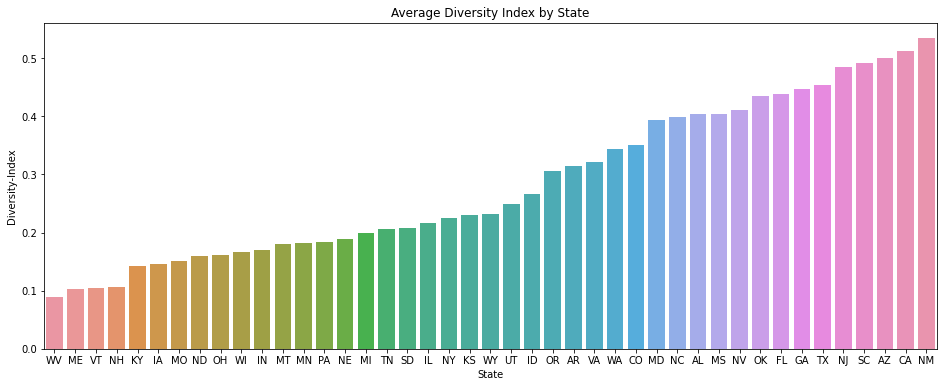

In [9]:
df_gb_state = df_gb_state.sort_values('Diversity-Index')

plt.figure(figsize=[16,6])
sns.barplot(x=df_gb_state.index, y=df_gb_state['Diversity-Index'])
plt.title('Average Diversity Index by State')
plt.show()

<br>
<br>

## Plot: TOTAL Violent Crimes by State

Note that this is a histogram of the raw data and it hasn't been corrected for population differences yet

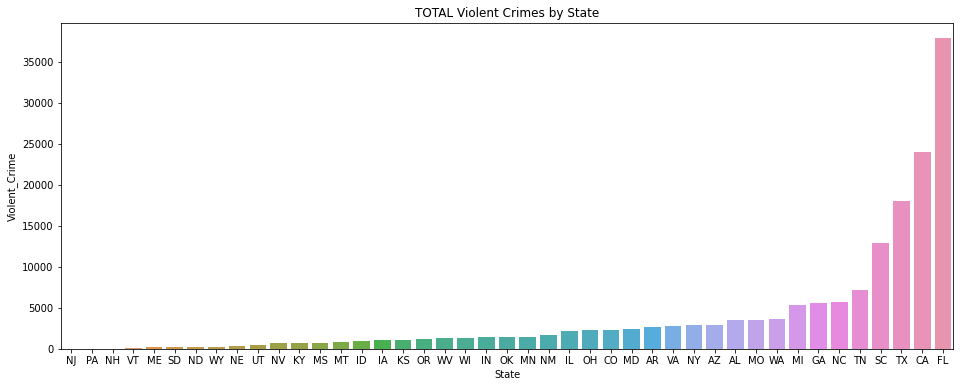

In [10]:
df_gb_state = df_gb_state.sort_values(by='Violent_Crime')

plt.figure(figsize=[16,6])

sns.barplot(x=df_gb_state.index, y=df_gb_state['Violent_Crime'])
plt.title('TOTAL Violent Crimes by State')
plt.show()

<br>
<br>

## Plot: Violent Crimes as a percentage of State population

Note that this is a histogram of the raw data and it hasn't been corrected for population differences yet

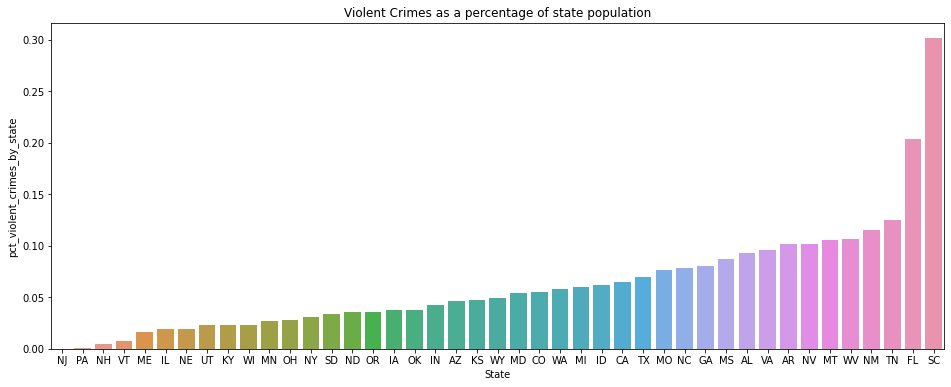

In [11]:
df_gb_state = df_gb_state.sort_values(by='pct_violent_crimes_by_state')

plt.figure(figsize=[16,6])

sns.barplot(x=df_gb_state.index, y=df_gb_state['pct_violent_crimes_by_state'])
plt.title('Violent Crimes as a percentage of state population')
plt.show()

<br>
<br>

## Plot: Comparing Diversity with Violent Crimes as a percentage of State population


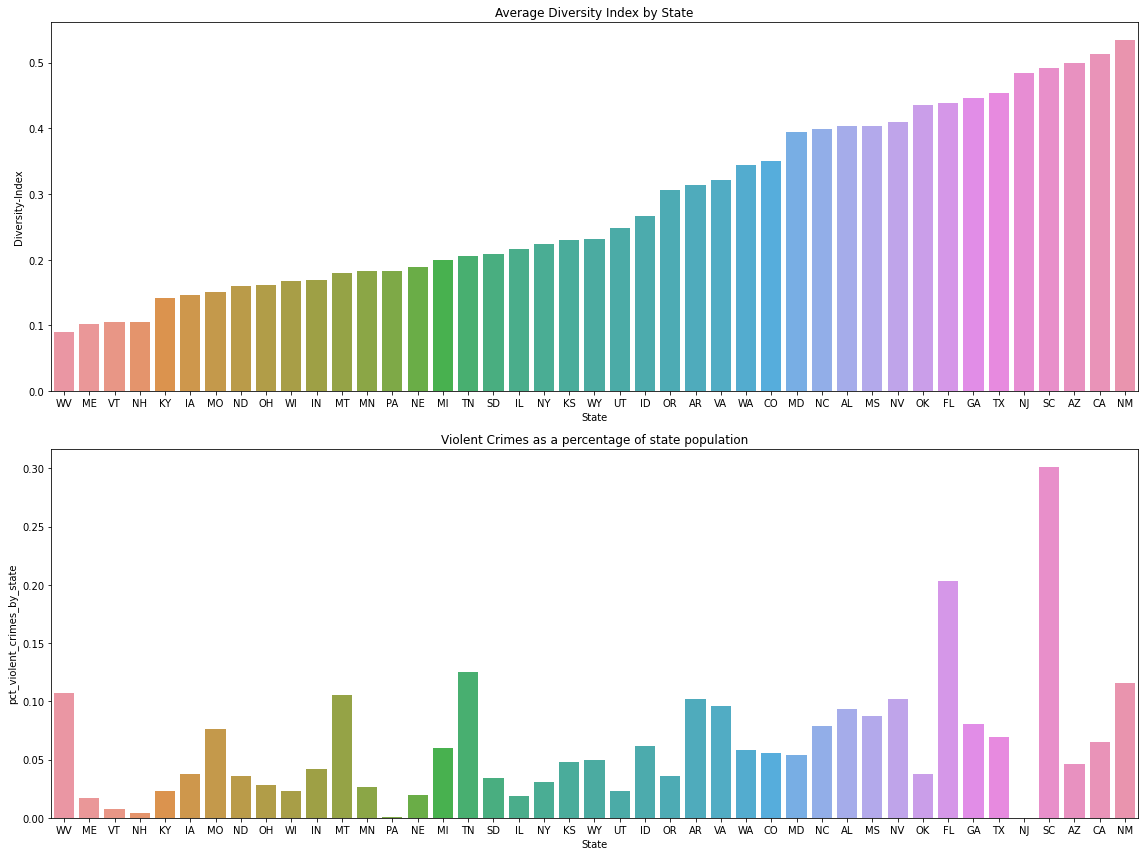

In [12]:
df_gb_state = df_gb_state.sort_values('Diversity-Index')

fig,axes = plt.subplots(2,1, figsize=(16,12))

sns.barplot(x=df_gb_state.index, y=df_gb_state['Diversity-Index'], ax=axes[0])
axes[0].title.set_text('Average Diversity Index by State')

sns.barplot(x=df_gb_state.index, y=df_gb_state['pct_violent_crimes_by_state'], ax=axes[1])
axes[1].title.set_text('Violent Crimes as a percentage of state population')

plt.tight_layout()
plt.show()


<br>
<br>
<br>
<hr>


# Plotting the data by County

<br>
<br>

In [13]:
df = df.set_index(['State', 'County'])
df

Diversity-Index  Violent_Crime  population_in_2013  \
State County                                                           
AL    Autauga            0.388898           72.0             54727.0   
      Baldwin            0.297942          111.0            194885.0   
      Barbour            0.556605           21.0             26937.0   
      Bibb               0.394100            8.0             22521.0   
      Blount             0.221056           91.0             57619.0   
...                           ...            ...                 ...   
WY    Platte             0.197897            2.0              8710.0   
      Sheridan           0.162154            1.0             29733.0   
      Sublette           0.218882           14.0             10175.0   
      Sweetwater         0.340296           20.0             45157.0   
      Uinta              0.225552            0.0             20951.0   

                  violent_crime_pct  
State County                         
AL    Autauga              0.001316  
      Baldwin              0.000570  
      Barbour              0.000780  
      Bibb                 0.000355  
      Blount               0.001579  
...                             ...  
WY    Platte               0.000230  
      Sheridan             0.000034  
      Sublette             0.001376  
      Sweetwater           0.000443  
      Uinta                0.000000  

[2422 rows x 4 columns]

<br>
<br>

## Violin plots

Plots show major outliers

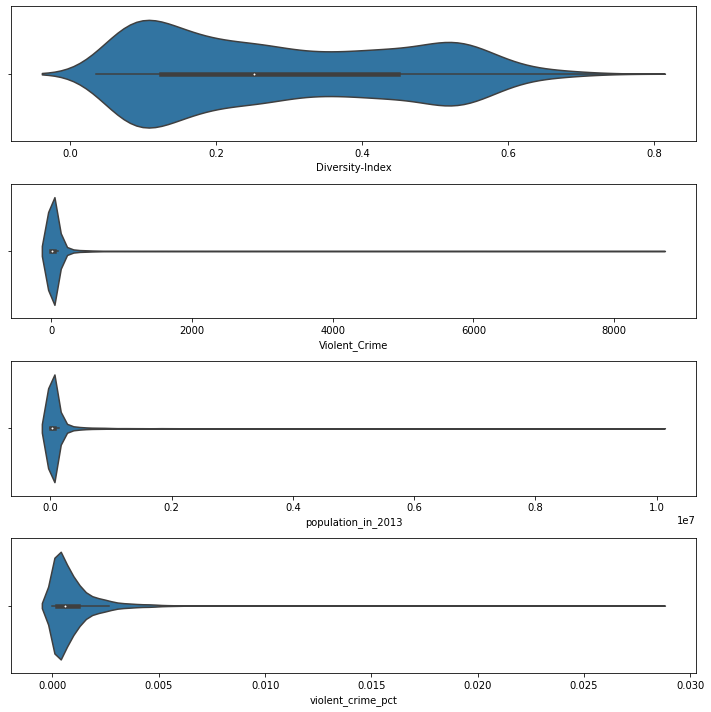

In [14]:

fig,ax = plt.subplots(4,1, figsize=(10,10), sharex=False, sharey=False)
    

sns.violinplot(x='Diversity-Index', data=df, ax=ax[0])
sns.violinplot(x='Violent_Crime', data=df, ax=ax[1])
sns.violinplot(x='population_in_2013', data=df, ax=ax[2])
sns.violinplot(x='violent_crime_pct', data=df, ax=ax[3])

plt.tight_layout()

<br>
<br>

## Pairplots with Linear Regression

Shows poor correlation, but the data has not had outliers removed.


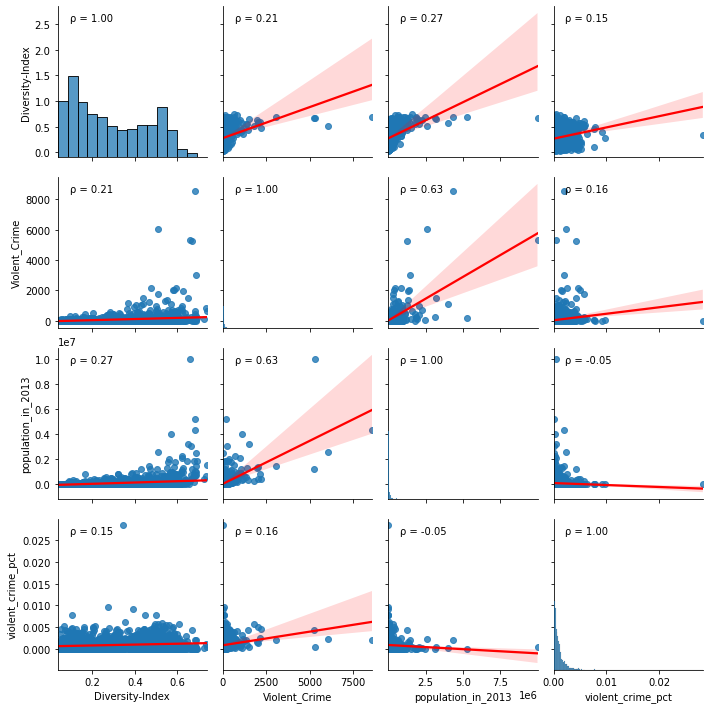

In [15]:
plot = sns.pairplot(df, kind='reg', plot_kws={'line_kws':{'color':'red'}})
plot.map(corrfunc)


<br>
<br>

## Temporarily remove outliers in the Y 


In [16]:
from feature_engine.outliers import OutlierTrimmer

# set up the capper
capper = OutlierTrimmer(capping_method='iqr', fold=1.5) #, variables=['violent_crime_pct'])

capper.fit(df)

df_trimmed = capper.transform(df)


<br>
<br>

## Violin plots

Plots show outliers removed

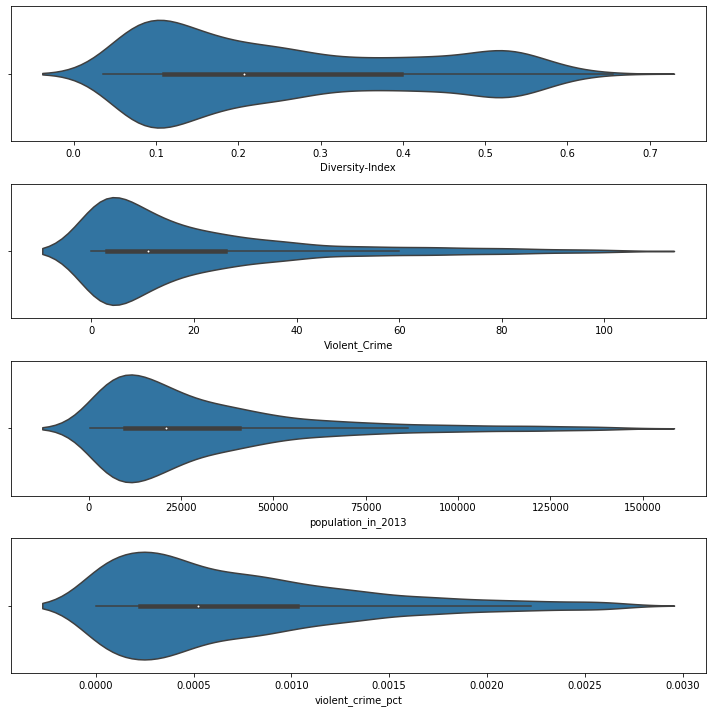

In [17]:

fig,ax = plt.subplots(4,1, figsize=(10,10), sharex=False, sharey=False)
    

sns.violinplot(x='Diversity-Index', data=df_trimmed, ax=ax[0])
sns.violinplot(x='Violent_Crime', data=df_trimmed, ax=ax[1])
sns.violinplot(x='population_in_2013', data=df_trimmed, ax=ax[2])
sns.violinplot(x='violent_crime_pct', data=df_trimmed, ax=ax[3])

plt.tight_layout()

<br>
<br>

## Compare Violin plots with before and after outlier removal

Plots show outliers removed

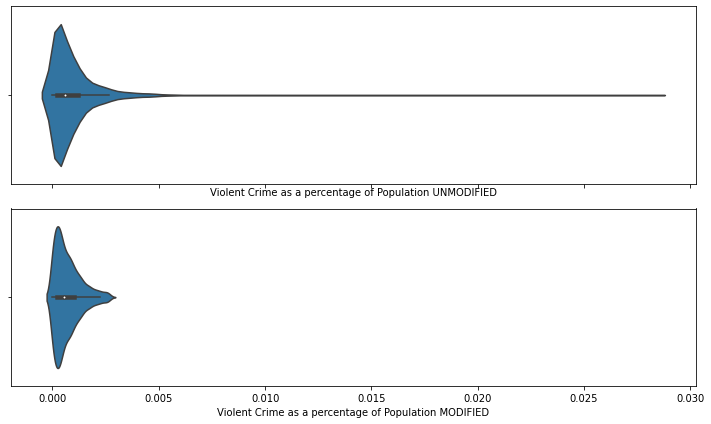

In [18]:

fig,ax = plt.subplots(2,1, figsize=(10,6), sharex=True, sharey=False)
    
axa = sns.violinplot(x='violent_crime_pct', data=df, ax=ax[0])
axa.set(xlabel='Violent Crime as a percentage of Population UNMODIFIED')

axa = sns.violinplot(x='violent_crime_pct', data=df_trimmed, ax=ax[1])
axa.set(xlabel='Violent Crime as a percentage of Population MODIFIED')

plt.tight_layout()

<br>
<br>

## Pairplots with Linear Regression and Outliers Removed

Still shows poor correlation


In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x = scaler.fit_transform(df_trimmed[['Diversity-Index', 'Violent_Crime', 'population_in_2013']])
scaled_x = pd.DataFrame(scaled_x, columns=['Diversity-Index', 'Violent_Crime', 'population_in_2013'], index=df_trimmed.index)
scaled_x
df_trimmed = scaled_x.merge(df_trimmed[['violent_crime_pct']], on=['State', 'County'])
df_trimmed

Diversity-Index  Violent_Crime  population_in_2013  \
State County                                                           
AL    Autauga            0.801135       2.454039            0.837437   
      Barbour            1.809287       0.097901           -0.123824   
      Bibb               0.832406      -0.502683           -0.276574   
      Blount            -0.207828       3.331815            0.937471   
      Butler             1.609499       0.744684           -0.351462   
...                           ...            ...                 ...   
WY    Platte            -0.347046      -0.779875           -0.754299   
      Sheridan          -0.561911      -0.826074           -0.027110   
      Sublette          -0.220897      -0.225490           -0.703625   
      Sweetwater         0.508970       0.051703            0.506409   
      Uinta             -0.180801      -0.872273           -0.330881   

                  violent_crime_pct  
State County                         
AL    Autauga              0.001316  
      Barbour              0.000780  
      Bibb                 0.000355  
      Blount               0.001579  
      Butler               0.001719  
...                             ...  
WY    Platte               0.000230  
      Sheridan             0.000034  
      Sublette             0.001376  
      Sweetwater           0.000443  
      Uinta                0.000000  

[1897 rows x 4 columns]

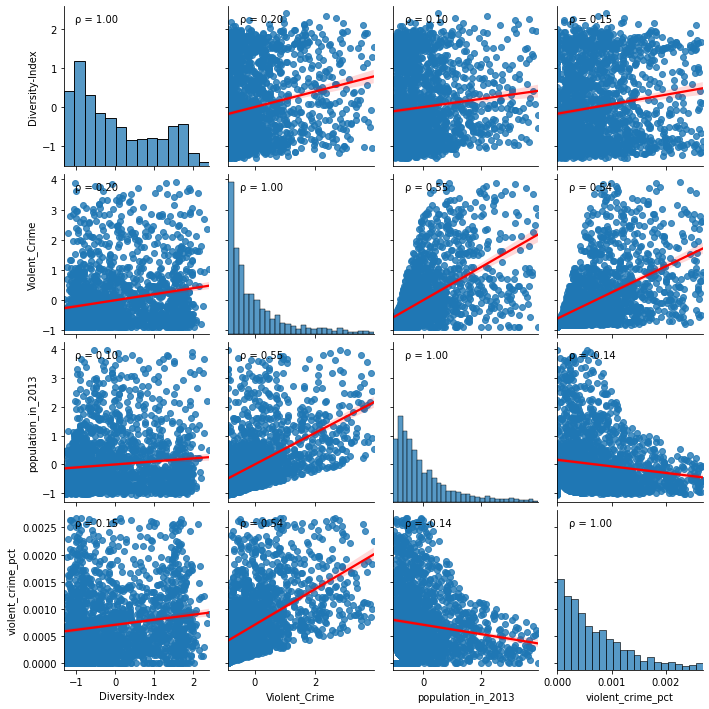

In [20]:
plot = sns.pairplot(df_trimmed, kind='reg', plot_kws={'line_kws':{'color':'red'}})
plot.map(corrfunc)

AttributeError: 'AxesSubplot' object has no attribute 'map'

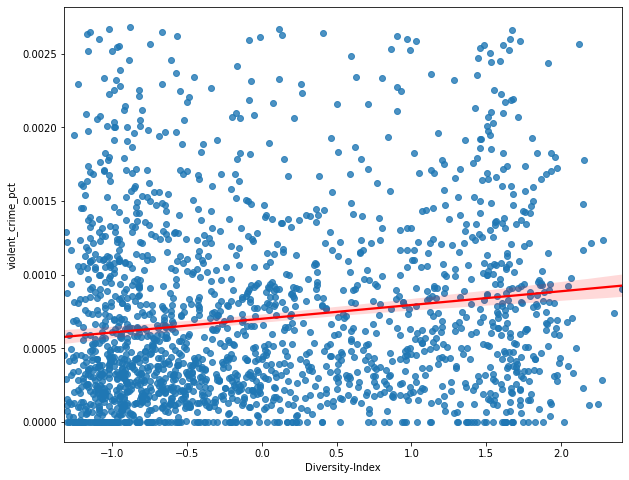

In [21]:
plt.figure(figsize=(10,8))
plot = sns.regplot(x='Diversity-Index', y='violent_crime_pct', data=df_trimmed, line_kws={'color':'red'})
plot.map(corrfunc)

In [ ]:

from pycaret.regression import *

df_regr = df_trimmed[['Diversity-Index', 'violent_crime_pct']].sort_values('Diversity-Index')

regr = setup(df_regr, target='violent_crime_pct', \
    normalize=True, remove_multicollinearity=True, create_clusters=True, remove_outliers=True)

,Description,Value
0,session_id,2786
1,Target,violent_crime_pct
2,Original Data,"(1897, 2)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1260, 21)"


In [ ]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,0.0005,0.0000,0.0006,0.0060,0.0006,1.3530,0.0050
xgboost,Extreme Gradient Boosting,0.0005,0.0000,0.0006,-0.0001,0.0006,1.3580,0.1950
lar,Least Angle Regression,0.0005,0.0000,0.0006,-0.0058,0.0006,1.3551,0.0060
br,Bayesian Ridge,0.0005,0.0000,0.0006,-0.0109,0.0006,1.3554,0.0050
lasso,Lasso Regression,0.0005,0.0000,0.0006,-0.0111,0.0006,1.3835,0.1040
en,Elastic Net,0.0005,0.0000,0.0006,-0.0111,0.0006,1.3835,0.0030
llar,Lasso Least Angle Regression,0.0005,0.0000,0.0006,-0.0111,0.0006,1.3835,0.0070
ridge,Ridge Regression,0.0005,0.0000,0.0006,-0.0121,0.0006,1.3559,0.0890
lr,Linear Regression,0.0005,0.0000,0.0006,-0.0140,0.0006,1.3590,0.1460
huber,Huber Regressor,0.0005,0.0000,0.0006,-0.0460,0.0006,1.1356,0.0080


In [ ]:
best

[]